# Practica 1.1. Manipuación de datos

## Objetivo

En esta práctica, aprenderás a aplicar técnicas de análisis de datos utilizando Pandas para explorar un dataset relacionado con la salud mental. El objetivo es que pongas en práctica tus habilidades de manipulación, limpieza y análisis de datos para obtener conclusiones interesantes.

Presenta: Michelle Cortès Pacheco

Carga del Dataset


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("dataset/mental_health.csv")

print(df.head())
print(df.shape)
print(df.dtypes.value_counts())
print(df.dtypes)

   Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  ...  Chronic_Illnesses  Medication_Use  \
0                 2             9  ...                  0             NaN   
1                 7             6  ...                  0       

- **¿Cuántos registros y columnas tiene el dataset?** en el dataset se tienen 1,200 registros y 21 columnas 
- **¿Qué tipo de datos predominan?** enteros, objetos y decimales (float)

Paso 2: Exploración Inicial
Ahora que ya tienes los datos cargados, es momento de explorar un poco más. Consulta información general como el tipo de datos en cada columna, 
cuántos datos no nulos hay, y revisa las primeras filas. También obtén estadísticas básicas como la media y el rango de los datos. 
Esto te ayudará a detectar si algo llama la atención o si hay datos fuera de lo normal.

In [90]:
print(df.info())
print('Not null:\n', df.isnull().sum())

print(df.head())
print(df.describe())


print(df.min)
print(df.max)


# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular el rango (máximo - mínimo)  en columnas numéricas
rango = numeric_df.max() - numeric_df.min()
print(rango)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

Paso 3: Limpieza de Datos
Es hora de "limpiar" los datos. Revisa si hay valores nulos o datos duplicados. Decide qué hacer con ellos: ¿los eliminarás, los reemplazarás o aplicarás otra estrategia? También asegúrate de que los tipos de datos de cada columna son correctos y convierte aquellos que no estén en el formato adecuado.

Preguntas:
¿Qué porcentaje del dataset contiene valores nulos? 
Medication_Use                   62.25
Substance_Use                    69.50
El resto de columnas tiene un porcentaje 0.0
  
¿Qué estrategia decidiste aplicar para tratar los valores nulos y por qué? se observa que el porcentaje de valores nulos es mayor al 50% pero las columnas Medication_Use (uso de medicación) y Substance_Use (uso de sustancias) pueden ser muy relevantes, por lo que eliminarlas directamente podría no ser la mejor opciòn. Considero que podrìa remplazarse el valor como 'no reportado' 

In [91]:
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
print("Porcentaje de valores nulos por columna:\n", porcentaje_nulos)
print("Numero de nulls")
df.isnull().sum()

duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")
filas_antes = df.shape[0]

# tratamiento de nulls
df["Medication_Use"].fillna("No", inplace=True)
df["Substance_Use"].fillna("No reportado", inplace=True)




Porcentaje de valores nulos por columna:
 Age                               0.00
Gender                            0.00
Education_Level                   0.00
Employment_Status                 0.00
Sleep_Hours                       0.00
Physical_Activity_Hrs             0.00
Social_Support_Score              0.00
Anxiety_Score                     0.00
Depression_Score                  0.00
Stress_Level                      0.00
Family_History_Mental_Illness     0.00
Chronic_Illnesses                 0.00
Medication_Use                   62.25
Therapy                           0.00
Meditation                        0.00
Substance_Use                    69.50
Financial_Stress                  0.00
Work_Stress                       0.00
Self_Esteem_Score                 0.00
Life_Satisfaction_Score           0.00
Loneliness_Score                  0.00
dtype: float64
Numero de nulls
Número de filas duplicadas: 0


En este paso, vas a calcular algunas estadísticas básicas para tres columnas importantes: Anxiety_Score, Depression_Score y Stress_Level. Queremos saber cuál es la media, la mediana y la desviación estándar de estos valores. Esto te permitirá tener una idea general sobre cómo están distribuidos estos puntajes.

Preguntas:
-¿Cuál de los tres puntajes tiene mayor variabilidad? Anxiety_Score       5.911138

-¿Qué observas sobre la diferencia entre media y mediana en cada caso? ¿Qué te dice esto sobre la distribución? 
*Anxiety_Score
Media: 10.47
Mediana: 10.50
Interpretación: La media y la mediana son casi iguales, lo que sugiere que la distribución es simétrica y no hay valores extremos que sesguen los datos.

*Depression_Score

Media: 10.67
Mediana: 11.00
Interpretación: La diferencia es mínima, lo que indica una distribución casi simétrica, pero con una ligera tendencia a valores menores. Esto podría significar que hay algunos valores bajos que reducen un poco la media.

*Stress_Level

Media: 5.00
Mediana: 5.00
Interpretación: Como la media y la mediana son exactamente iguales, la distribución es perfectamente simétrica.

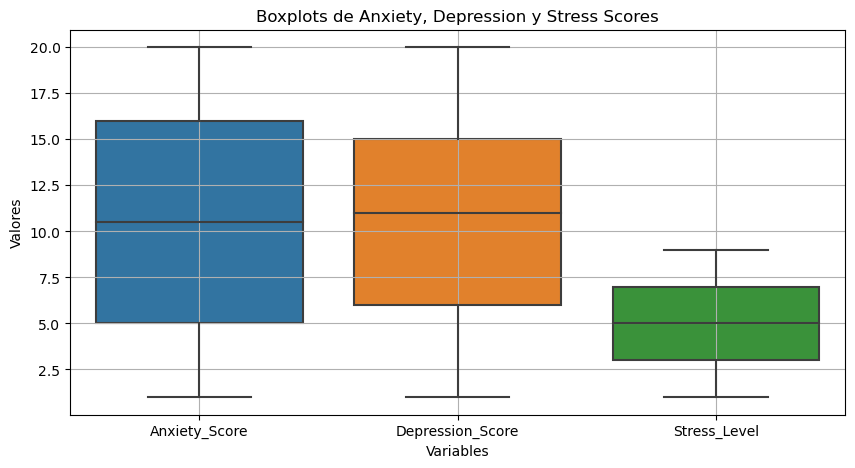

In [92]:
columns_of_interest = ['Anxiety_Score', 'Depression_Score', 'Stress_Level']
df[columns_of_interest].describe()
df[['Anxiety_Score', 'Depression_Score', 'Stress_Level']].std()
df[['Anxiety_Score', 'Depression_Score', 'Stress_Level']].agg(['mean', 'median'])



# Cargar el dataset
file_path = "dataset/mental_health.csv"  # Reemplaza con la ruta correcta
df_cleaned = pd.read_csv(file_path)

# Seleccionar las columnas de interés
columns_of_interest = ['Anxiety_Score', 'Depression_Score', 'Stress_Level']

# Crear los boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned[columns_of_interest])
plt.title("Boxplots de Anxiety, Depression y Stress Scores")
plt.ylabel("Valores")
plt.xlabel("Variables")
plt.grid(True)

# Mostrar la gráfica
plt.show()




Paso 5: Filtrado de Datos
Aquí vas a enfocarte en subconjuntos específicos del dataset. Primero, identifica a las personas que tienen un puntaje alto en ansiedad (puedes elegir un valor alto, como por encima de 80). Luego, clasifica a las personas según las horas de sueño que reportan (menos de 5 horas, entre 5 y 7 horas, y más de 7 horas) y analiza cómo varía el nivel de estrés en cada grupo.

Preguntas:
¿Qué porcentaje del total presenta niveles altos de ansiedad?
¿Existe una relación visible entre las horas de sueño y el nivel de estrés?si, porque el calor mas alto 

Paso 6: Ordenamiento
Ahora vas a ordenar el dataset para encontrar a las personas con mayor satisfacción de vida y menor puntaje de soledad. ¿Puedes descubrir algún patrón? ¿Qué tienen en común estas personas?

Preguntas:
¿Qué características comunes encuentras en estas 10 personas?
¿Qué hipótesis podrías plantear sobre el vínculo entre satisfacción y soledad?

Porcentaje de personas con niveles altos de ansiedad: 31.58%
Correlación entre horas de sueño y nivel de estrés: -0.0003


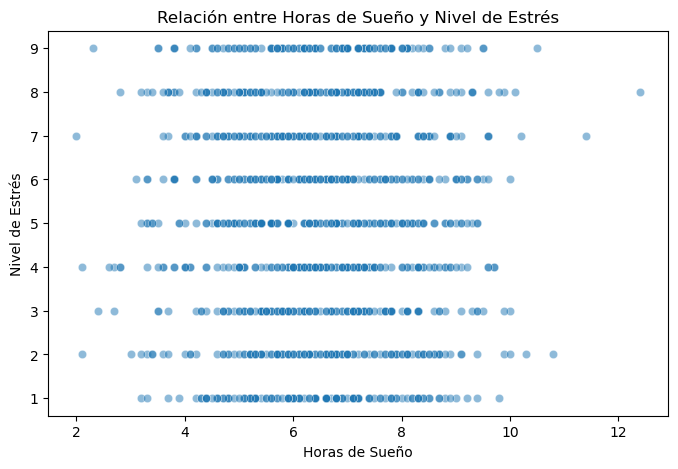

Top 10 personas con mayor satisfacción y menor soledad:
     Age  Gender Education_Level Employment_Status  Sleep_Hours  \
14    53    Male      Bachelor's          Employed          4.9   
33    44    Male      Bachelor's          Employed          7.2   
83    61  Female             PhD        Unemployed          5.7   
92    31  Female             PhD          Employed          6.8   
103   43  Female           Other           Student          5.5   
217   25  Female        Master's          Employed          6.9   
262   49  Female     High School           Retired          3.6   
391   44   Other             PhD           Retired          7.4   
438   41  Female        Master's          Employed          5.4   
675   29    Male           Other        Unemployed          8.0   

     Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
14                     1.5                     5             17   
33                     1.7                     3              4   
83   

In [93]:
# Para el filtrado, se maneja un valor mayor a 15
umbral_ansi = 15

porcentaje_alta_ansiedad = (df[df["Anxiety_Score"] >= umbral_ansi].shape[0] / df.shape[0]) * 100
print(f"Porcentaje de personas con niveles altos de ansiedad: {porcentaje_alta_ansiedad:.2f}%")

correlacion = df["Sleep_Hours"].corr(df["Stress_Level"])
print(f"Correlación entre horas de sueño y nivel de estrés: {correlacion:.4f}")

# Visualización de la relación con un gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Sleep_Hours"], y=df["Stress_Level"], alpha=0.5)
plt.xlabel("Horas de Sueño")

plt.ylabel("Nivel de Estrés")
plt.title("Relación entre Horas de Sueño y Nivel de Estrés")
plt.show()

# Ordenar el dataset por mayor satisfacción de vida y menor puntaje de soledad
top_10_satisfied = df.sort_values(by=["Life_Satisfaction_Score", "Loneliness_Score"], ascending=[False, True]).head(10)
print("Top 10 personas con mayor satisfacción y menor soledad:")
print(top_10_satisfied)

In [94]:
# Filtrar el dataset para personas que reciben terapia y tienen nivel de estrés por debajo de la mediana
mediana_estres = df["Stress_Level"].median()
menor_estres = df[(df_cleaned["Therapy"] == 1) & (df["Stress_Level"] < mediana_estres)]

menor_estres .to_csv("terapia_bajo_estres.csv", index=False)
print(f"Número de personas que reciben terapia y tienen bajo nivel de estrés: {menor_estres.shape[0]}")


Número de personas que reciben terapia y tienen bajo nivel de estrés: 108


De todo lo anterior se concluye que ell coeficiente de correlación entre horas de sueño y nivel de estrés es de -0.0003, lo que indica que no existe una relación significativa entre ambas variables. Este valor está muy cerca de 0, lo que sugiere que, en este conjunto de datos, dormir más o menos horas no está directamente asociado con un mayor o menor nivel de estrés.

Este resultado implica que otros factores podrian estar influyendo en los niveles de estrés, aunque la ansiedad afecta a un porcentaje considerable de la muestra, no se encontró una relación directa entre las horas de sueño y el nivel de estrés.El 31.58% de los participantes en el estudio presentan niveles altos de ansiedad, lo que indica que casi una tercera parte de la población analizada experimenta ansiedad significativa.
Aunque hay personas que reciben terapia y reportan bajo estrés, no se puede afirmar de manera concluyente que la terapia sea la única razón de su menor nivel de estrés.

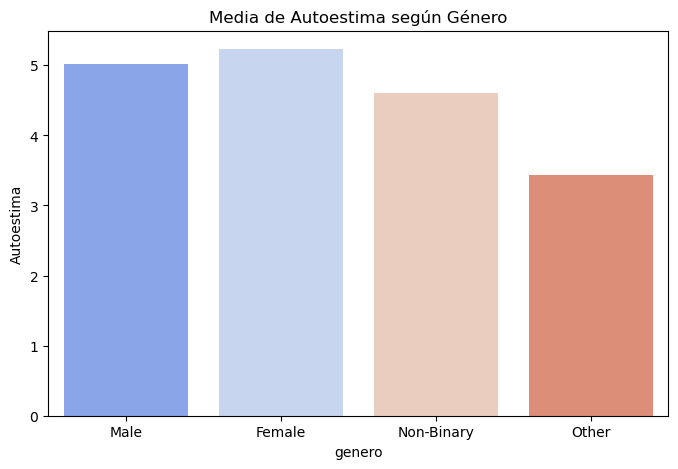

In [97]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df_cleaned["Gender"], y=df_cleaned["Self_Esteem_Score"], estimator=pd.Series.mean, errorbar=None, palette="coolwarm")
plt.xlabel("genero")
plt.ylabel("Autoestima")
plt.title("Media de Autoestima según Género")
plt.show()

